# Proyecto final de Soporte 
# Reconocimiento de sentimiento de tweets de Tweeter

## Paso 01: Analisis del dataset

### importando librerias

In [2]:
%matplotlib inline
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from textblob import TextBlob
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold, cross_val_score, train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.learning_curve import learning_curve
#nltk.download('wordnet')
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')

c:\users\alfredo\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\users\alfredo\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
c:\users\alfredo\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection modu

### Obteniendo el dataset

In [3]:
messages = pd.read_csv('train.csv', encoding = "ISO-8859-1")
messages.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


### Estadistica descriptiva

In [4]:
messages.groupby('Sentiment').describe()

ItemID                                                      \
             count          mean           std  min       25%      50%   
Sentiment                                                                
0          43532.0  47383.876413  29754.229279  1.0  20397.75  46716.0   
1          56457.0  52026.250775  27994.983763  3.0  28281.00  52305.0   

                              
               75%       max  
Sentiment                     
0          73366.0   99998.0  
1          76096.0  100000.0

### Creamos la columna length para calcular la logitud de los tweets

In [6]:
messages['length'] = messages['SentimentText'].map(lambda text: len(text))
messages.head()

#for word in messages.SentimentText[:]:
       #print(word)
 #   if word.startswith('@'):
#     messages.length.replace(word, '')
messages

,ItemID,Sentiment,SentimentText,length
0,1,0,is so sad for my APL frie...,61
1,2,0,I missed the New Moon trail...,51
2,3,1,omg its already 7:30 :O,37
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,132
4,5,0,i think mi bf is cheating on me!!! ...,53
5,6,0,or i just worry too much?,42
6,7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!,41
7,8,0,Sunny Again Work Tomorrow :-| ...,61
8,9,1,handed in my uniform today . i miss you ...,53
9,10,1,hmmmm.... i wonder how she my number @-),46


### Visualizamos con un histograma la logitud de los tweets

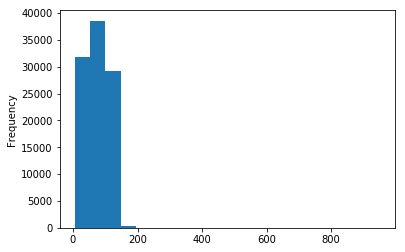

In [5]:
messages.length.plot(bins = 20, kind = 'hist')

### Describiremos el atributo SentimentText

In [6]:
messages.length.describe()

count    99989.000000
mean        77.264309
std         36.382639
min          6.000000
25%         47.000000
50%         73.000000
75%        108.000000
max        949.000000
Name: length, dtype: float64

### Cual es el mensaje mas largo

In [7]:
list(messages.SentimentText[messages.length > 900])

[" brokeback mountain was terrible.\n8838,0,Sentiment140,# @Catherine42 I wouldn't mind but I only had 1/2 a portion &amp; then left 1/2 the cream  just fruit for me then until my hols  x\n8839,1,Sentiment140,# @DeliciousLunch ... dark chocolate cookies? oh you tease! I'm writing to day n dipping into twitter for company \n8840,1,Sentiment140,# followfriday @mstuyvenberg @feb_unsw @hazelmail @beckescreet - all almost as cool as he-man and she-ra \n8841,1,Sentiment140,# followfriday @presentsqueen because she talks sense \n8842,1,Sentiment140,# New York is the most amazing city i've ever been to \n8843,0,Sentiment140,# number times I bottomed out just in our driveway = 4... a 6.5 hour trip to mass.. I'm scared \n8844,0,Sentiment140,# of NYC celebrity street vendors &gt; # of POA celebrities  http://streetvendor.org/media/pdfs/Side2.pdf\n8845,1,Sentiment140,###### yay ##### thanks @matclayton ##### \n8846,0,Sentiment140,#$%#$^#%@ I HATE THE DENTIST"]

### Diferencias entre el mensaje de sentimiento 0 y 1

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1326AB50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x131EC350>], dtype=object)

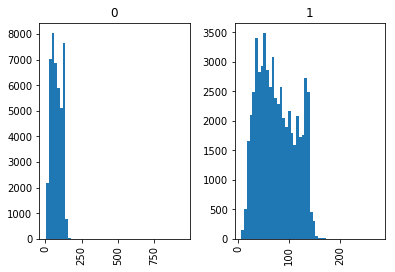

In [8]:
messages.hist(column = 'length', by = 'Sentiment', bins = 50)

## PASO 02: Preprocesamiento de datos, en esta seccion manipularemos los mensajes en brutos para convertirlos en vectores de numeros

### Creamos una funcion para poder separar las palabras en un mensaje 

In [7]:
def split_into_tokens(message):
    return TextBlob(message).words

### Viendo los resultados

In [8]:
messages.SentimentText.head().apply(split_into_tokens)

0                  [is, so, sad, for, my, APL, friend]
1                 [I, missed, the, New, Moon, trailer]
2                         [omg, its, already, 7:30, O]
3    [Omgaga, Im, sooo, im, gunna, CRy, I, 've, bee...
4        [i, think, mi, bf, is, cheating, on, me, T_T]
Name: SentimentText, dtype: object

### Con TextBlob detectamos las etiquetas POS 

In [9]:
TextBlob("Hello world, how is it going?").tags

[('Hello', 'NNP'),
 ('world', 'NN'),
 ('how', 'WRB'),
 ('is', 'VBZ'),
 ('it', 'PRP'),
 ('going', 'VBG')]

### Normalizamos las palabras mediante la forma lematizada

In [10]:
def split_into_lemmas(message):
    message = message.lower()
    words = TextBlob(message).words
    return [word.lemma for word in words]

### Viendo los resultados

In [11]:
messages.SentimentText.head().apply(split_into_lemmas)

0                  [is, so, sad, for, my, apl, friend]
1                 [i, missed, the, new, moon, trailer]
2                          [omg, it, already, 7:30, o]
3    [omgaga, im, sooo, im, gunna, cry, i, 've, bee...
4        [i, think, mi, bf, is, cheating, on, me, t_t]
Name: SentimentText, dtype: object

## PASO 03: Datos a Vectores

### Ahora convertiremos cada mensaje, representado como una lista de tokens (lemas) arriba, en un vector que los modelos de aprendizaje automático pueden entender

### Hacer eso requiere esencialmente tres pasos:

### 1. Contar cuantas veces ocurre una palabra en un mensaje.

### 2. Ponderando los conteos para que los tokens frecuentes obtengan un menor peso.

### 3. Normalizar los vectores a la longitud de la unidad, para abstraer de la longitud del texto original.

### bow_transformer nos permite contabilizar la cantidad de veces que una palabra se repite

In [14]:
bow_transformer = CountVectorizer(analyzer=split_into_lemmas).fit(messages['SentimentText'])

### contabilizamos la cantidad de palabras existen en los tweets

In [15]:
len(bow_transformer.vocabulary_)

108478

### En esta seccion usaremos sklearn, una potente biblioteca de python para enseñar a aprender maquinas. Contiene una multitud de varios metodos y opciones

### Tomemos un mensaje de texto y obtengamos su conteo de bolsa de palabras como un vector, poniendo en uso nuestro nuevo bow_transformer

In [17]:
message4 = messages['SentimentText'][3]
print(message4)

          .. Omgaga. Im sooo  im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...


In [18]:
bow4 = bow_transformer.transform([message4])
print(bow4)
bow4.shape

  (0, 579)	1
  (0, 984)	1
  (0, 1695)	1
  (0, 2421)	1
  (0, 4137)	1
  (0, 23809)	1
  (0, 30256)	1
  (0, 56715)	1
  (0, 56858)	1
  (0, 58655)	1
  (0, 65532)	1
  (0, 66937)	1
  (0, 69679)	2
  (0, 70152)	2
  (0, 72904)	1
  (0, 83016)	1
  (0, 83065)	1
  (0, 87227)	1
  (0, 92683)	1
  (0, 93791)	1
  (0, 95816)	1
  (0, 97756)	1
  (0, 103429)	1


(1, 108478)

### Comprobando cual de estas palabras aparecen 2 veces

In [19]:
print(bow_transformer.get_feature_names()[69679])
print(bow_transformer.get_feature_names()[70152])

i
im


### Realizamos el conteo de bag-of-words en el SMS message completo

In [21]:
messages_bow = bow_transformer.transform(messages['SentimentText'])

### Veamos los resultados

In [22]:
print(messages_bow)

  (0, 20081)	1
  (0, 64138)	1
  (0, 64576)	1
  (0, 71168)	1
  (0, 80351)	1
  (0, 90307)	1
  (0, 93494)	1
  (1, 69679)	1
  (1, 79004)	1
  (1, 79549)	1
  (1, 81297)	1
  (1, 97367)	1
  (1, 99366)	1
  (2, 3657)	1
  (2, 13050)	1
  (2, 71345)	1
  (2, 82467)	1
  (2, 83013)	1
  (3, 579)	1
  (3, 984)	1
  (3, 1695)	1
  (3, 2421)	1
  (3, 4137)	1
  (3, 23809)	1
  (3, 30256)	1
  :	:
  (99985, 100119)	1
  (99985, 103907)	1
  (99985, 104452)	1
  (99985, 106798)	1
  (99986, 57330)	1
  (99986, 69679)	1
  (99986, 93494)	1
  (99986, 97855)	1
  (99986, 106209)	1
  (99987, 343)	1
  (99987, 57331)	1
  (99987, 64823)	1
  (99987, 65850)	1
  (99987, 67173)	1
  (99987, 69679)	1
  (99987, 77909)	1
  (99987, 79593)	1
  (99987, 104949)	1
  (99987, 106569)	2
  (99987, 106798)	1
  (99988, 57332)	1
  (99988, 59664)	1
  (99988, 67202)	1
  (99988, 106569)	1
  (99988, 106798)	1


### Realizamos la ponderacion y normalizacion con TF-IDF

In [19]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 103429)	0.108606535463
  (0, 97756)	0.120621656382
  (0, 95816)	0.349690568253
  (0, 93791)	0.204896345735
  (0, 92683)	0.182563091117
  (0, 87227)	0.182407241122
  (0, 83065)	0.100648950707
  (0, 83016)	0.349690568253
  (0, 72904)	0.109713232855
  (0, 70152)	0.274665208952
  (0, 69679)	0.107239667468
  (0, 66937)	0.251638864994
  (0, 65532)	0.115990512718
  (0, 58655)	0.263366991484
  (0, 56858)	0.191493955221
  (0, 56715)	0.294312447848
  (0, 30256)	0.143113117149
  (0, 23809)	0.117807113704
  (0, 4137)	0.0756116189308
  (0, 2421)	0.317187623043
  (0, 1695)	0.148902454488
  (0, 984)	0.240185862625
  (0, 579)	0.146360201389


### ¿Cuál es la IDF (frecuencia inversa del documento) de la palabra "u"? ¿De palabra "university"?

In [20]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['i']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['im']])

1.81237139823
4.64189586321


### Para transformar todo el corpus de bolsa de palabras en corpus TF-IDF a la vez:

In [21]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)
print(messages_tfidf)

(99989, 108478)
  (0, 93494)	0.224468668929
  (0, 90307)	0.336021324845
  (0, 80351)	0.199957489639
  (0, 71168)	0.20463396622
  (0, 64576)	0.35106133757
  (0, 64138)	0.203979611638
  (0, 20081)	0.768110463035
  (1, 99366)	0.585257952826
  (1, 97367)	0.168505861825
  (1, 81297)	0.353770101447
  (1, 79549)	0.558622351044
  (1, 79004)	0.419148131389
  (1, 69679)	0.127206648309
  (2, 83013)	0.400920209814
  (2, 82467)	0.424982262462
  (2, 71345)	0.17322387011
  (2, 13050)	0.385742467417
  (2, 3657)	0.692711557296
  (3, 103429)	0.108606535463
  (3, 97756)	0.120621656382
  (3, 95816)	0.349690568253
  (3, 93791)	0.204896345735
  (3, 92683)	0.182563091117
  (3, 87227)	0.182407241122
  (3, 83065)	0.100648950707
  :	:
  (99985, 37057)	0.195852462131
  (99985, 23809)	0.123187820806
  (99985, 21623)	0.365662290714
  (99985, 339)	0.13859089289
  (99986, 106209)	0.384405373855
  (99986, 97855)	0.380139645724
  (99986, 93494)	0.233461903851
  (99986, 69679)	0.122497018039
  (99986, 57330)	0.79888445

## PASO 04: Entrenando el modelo y detectando el SPAM

### Escogemos el clasificador Naive Bayes y determinamos el tiempo en que el clasificador resolvera una clase Sentiment

In [22]:
%time spam_detector = MultinomialNB().fit(messages_tfidf, messages['Sentiment'])

Wall time: 138 ms


### Clasificaremos un mensaje aleatoriamente

In [23]:
print('predicted:', spam_detector.predict(tfidf4)[0])
print('expected:', messages.Sentiment[3])

predicted: 0
expected: 0


### Probamos realizando todas las predicciones

In [24]:
all_predictions = spam_detector.predict(messages_tfidf)
print(all_predictions)

[0 1 0 ..., 0 1 1]


### Cuantos mensajes se lograron clasificar de manera correcta

In [25]:
print('accuracy', accuracy_score(messages['Sentiment'], all_predictions))
print('confusion matrix\n', confusion_matrix(messages['Sentiment'], all_predictions))
print('(row=expected, col=predicted)')

accuracy 0.870445749032
confusion matrix
 [[33236 10296]
 [ 2658 53799]]
(row=expected, col=predicted)


### De forma grafica

Text(0.5,0,'predicted label')

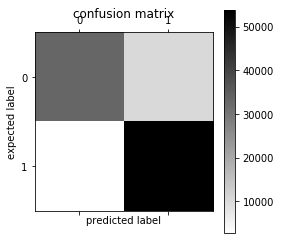

In [26]:
plt.matshow(confusion_matrix(messages['Sentiment'], all_predictions), cmap=plt.cm.binary, interpolation='nearest')
plt.title('confusion matrix')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')

### A partir de esta matriz de confusión, podemos calcular la precisión y la recuperación, o su combinación (media armónica)

In [27]:
print(classification_report(messages['Sentiment'], all_predictions))

             precision    recall  f1-score   support

          0       0.93      0.76      0.84     43532
          1       0.84      0.95      0.89     56457

avg / total       0.88      0.87      0.87     99989



### PASO 05: Corriendo el experimento

In [52]:
msgs = pd.read_csv('test.csv', encoding = "ISO-8859-1")
msgs = msgs[99989:100000]
print(msgs)

       ItemID                                      SentimentText
99989  100001  @cupcake_kitty I love how you're so live on tw...
99990  100002  @cupcake_nyc  boooo hahah ugh this weekend is ...
99991  100003  @cupcake_nyc sounds good I have some things to...
99992  100004  @cupcake_nyc Why does Yahoo! always only take ...
99993  100005     @cupcake_rachel ha ha, you do amuse me Rach  x
99994  100006  @Cupcake1012 You're welcome~ The Gokey Gang wi...
99995  100007  @cupcake79 i'm just coming straight home, and ...
99996  100008  @cupcake79 Should  but won't. I'm such a masoc...
99997  100009  @cupcakebrii good luck. i wanted to apply at b...
99998  100010  @cupcakecanadian - a cupcake would totally hit...
99999  100011  @cupcakecartel69 what a small world  yummy cup...


In [49]:
msgs_bow = bow_transformer.transform(msgs['SentimentText'])
tfidf_transformer = TfidfTransformer().fit(msgs_bow)
msgs_tfidf = tfidf_transformer.transform(msgs_bow)
all_predictions_msgs = spam_detector.predict(msgs_tfidf)
print(all_predictions_msgs)

[1 0 0 0 1 1 0 0 0 1 1]


In [32]:
msgs = pd.read_csv('train.csv', encoding = "ISO-8859-1")
msgs

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...
5,6,0,or i just worry too much?
6,7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!
7,8,0,Sunny Again Work Tomorrow :-| ...
8,9,1,handed in my uniform today . i miss you ...
9,10,1,hmmmm.... i wonder how she my number @-)


In [40]:
message4 = 'I happy why'
bow4 = bow_transformer.transform([message4])
tfidf4 = tfidf_transformer.transform(bow4)
print('predicted:', spam_detector.predict(tfidf4)[0])

predicted: 1
